In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dfx = pd.read_csv("./Train/Diabetes_XTrain.csv")
dfy = pd.read_csv("./Train/Diabetes_YTrain.csv")
dfxtest = pd.read_csv("./Test/Diabetes_XTest.csv")
dfy.shape


(576, 1)

In [3]:
x = dfx.values
y = dfy.values.reshape(-1,)
xt = dfxtest.values


In [4]:
def distance(x,q):
    return np.sqrt(sum((x-q)**2))

In [5]:
def knn(x,y,q,k=25):
    vals = []
    for i in range(x.shape[0]):
        d = distance(x[i],q)
        vals.append((d,y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    data = np.unique(vals[:,1],return_counts = True)
    ind = data[1].argmax()
    result = data[0][ind]
    return int(result)

In [12]:
def get_acc(x_tst,x,y):
    
    y_pred = []
    cnt=0
    for i in range(x_tst.shape[0]):
        p = knn(x,y,x_tst[i])        
        y_pred.append(p)
    y_pred = np.array(y_pred)
    
    return  y_pred

In [13]:
query_point = x[3]

res = get_acc(xt,x,y)
print(res)

[0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0]


In [15]:
output = np.unique(res,return_counts=True)
print(output)
cnt_0 = output[1][0]
cnt_1 = output[1][1]
print(cnt_0,cnt_1)

(array([0, 1]), array([136,  56], dtype=int64))
136 56


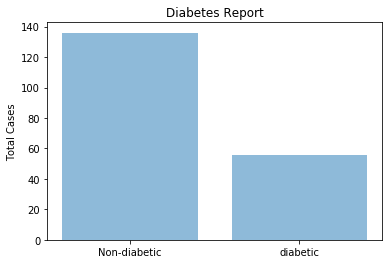

In [18]:
labels = ("Non-diabetic","diabetic")
rangex = np.arange(len(labels))
performance = [cnt_0,cnt_1]
plt.bar(rangex, performance, align='center', alpha=0.5)
plt.xticks(rangex, labels)
plt.ylabel('Total Cases')
plt.title('Diabetes Report')

plt.show()